In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    display(dirname,len(filenames))
    # for filename in filenames:
    #     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'/kaggle/input'

0

'/kaggle/input/formula-one-cars'

0

'/kaggle/input/formula-one-cars/Formula One Cars'

0

'/kaggle/input/formula-one-cars/Formula One Cars/Ferrari F1 car'

374

'/kaggle/input/formula-one-cars/Formula One Cars/Racing Point F1 car'

290

'/kaggle/input/formula-one-cars/Formula One Cars/McLaren F1 car'

372

'/kaggle/input/formula-one-cars/Formula One Cars/AlphaTauri F1 car'

123

'/kaggle/input/formula-one-cars/Formula One Cars/Red Bull Racing F1 car'

340

'/kaggle/input/formula-one-cars/Formula One Cars/Mercedes F1 car'

324

'/kaggle/input/formula-one-cars/Formula One Cars/Renault F1 car'

323

'/kaggle/input/formula-one-cars/Formula One Cars/Williams F1 car'

340

In [2]:
from fastai.text.all import *
from fastai.collab import *
from fastai.vision.all import *
from fastai.tabular.all import *

In [3]:
from PIL import Image, UnidentifiedImageError
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verify if the image is valid (doesn't load fully into memory)
        return True
    except (IOError, UnidentifiedImageError) as e:
        print(f"Invalid image: {file_path}, Error: {e}")
        return False

In [4]:
path = '/kaggle/input/formula-one-cars/Formula One Cars'
files = [f for f in get_image_files(path) if f.name.endswith('jpg') and is_valid_image(f)]

Invalid image: /kaggle/input/formula-one-cars/Formula One Cars/Red Bull Racing F1 car/00000468.jpg, Error: cannot identify image file '/kaggle/input/formula-one-cars/Formula One Cars/Red Bull Racing F1 car/00000468.jpg'


In [5]:
def car_name(x):
    x=str(x)
    if x.find('Ferrari')!=-1:
        return "Ferrari"
    elif x.find('Red')!=-1:
        return "RedBull"
    elif x.find('AlphaTauri')!=-1:
        return "Alphaturi"
    elif x.find('Racing')!=-1:
        return "Racing Point"
    elif x.find('McLaren')!=-1:
        return "McLaren"
    elif x.find("Mercedes")!=-1:
        return "Mercedes"
    elif x.find("Renault")!=-1:
        return "Renault"
    elif x.find("Williams")!=-1:
        return "Williams"

In [6]:
dls = ImageDataLoaders.from_path_func(path='/kaggle/input/formula-one-cars/Formula One Cars',fnames=files,valid_pct=0.2,label_func=car_name,item_tfms=[Resize(224),ToTensor()],batch_tfms = IntToFloatTensor())

In [7]:
??ImageDataLoaders

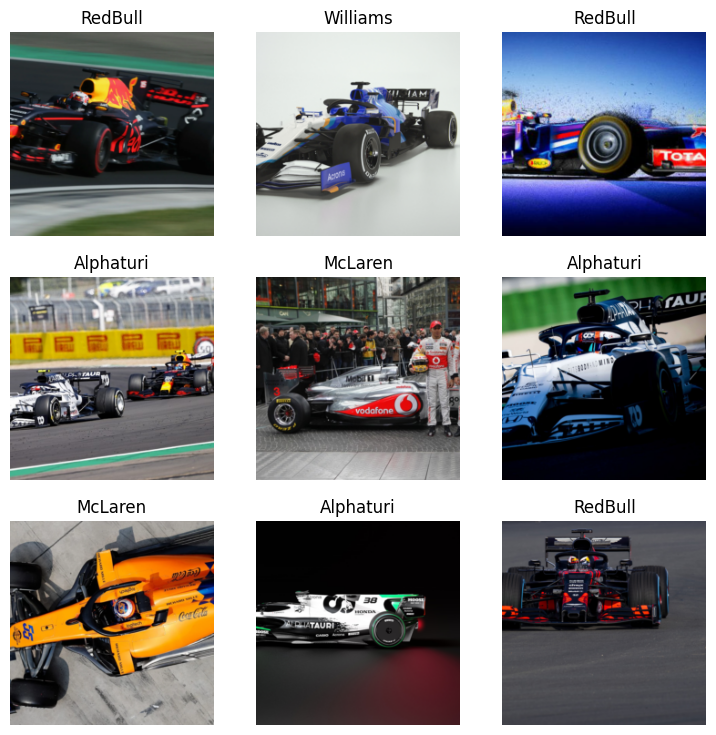

In [8]:
dls.show_batch()

In [9]:
??dls.show_batch

In [10]:
learn = vision_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.383637,0.867729,0.754923,00:36


epoch,train_loss,valid_loss,accuracy,time
0,0.968497,0.679109,0.811816,00:36
1,0.679885,0.616212,0.859956,00:37
2,0.467552,0.597765,0.868709,00:38
3,0.331062,0.655584,0.864333,00:35
4,0.233203,0.614712,0.873085,00:36
5,0.165383,0.611129,0.877462,00:36
6,0.115697,0.603743,0.890591,00:38
7,0.088309,0.610403,0.888403,00:36


In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


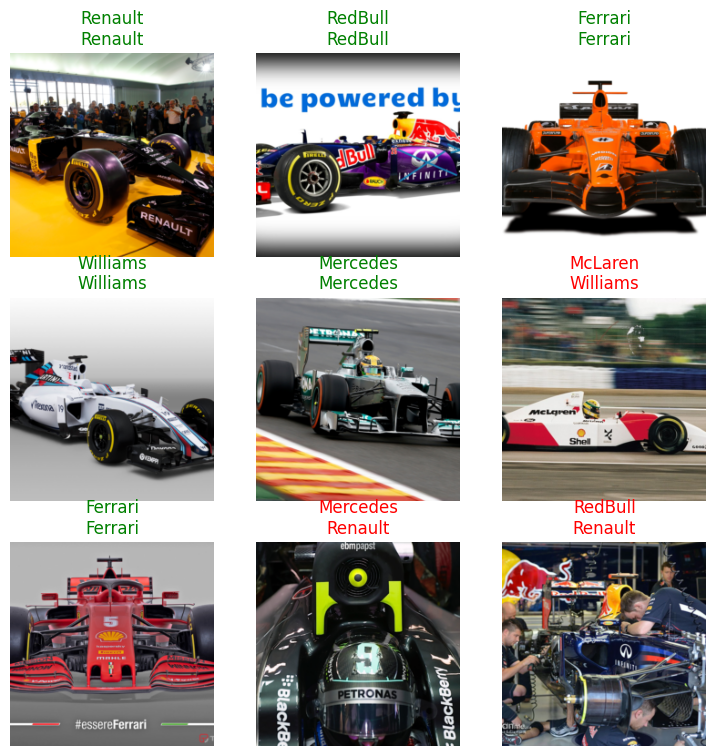

In [12]:
learn.show_results()